# Workshop 03 - Lineal Regression

## Exercise

<img src="Images/Ejercicio1.png" width="600"> 
<br>
<img src="Images/Ejercicio2.png" width="600">

In [2]:
# Imports of the necessary libraries are carried out
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#   Function: hypothesis() 
#   Purpose: Calculate the linear regression hypothesis
#   Argument:
#       theta_0: Parameter theta 0
#       theta_1: Parameter theta 1
#       x: evaluated feature
#   Return:
#       hypothesis of lineal regression
def hypothesis(theta_0, theta_1, x):
    return theta_0 + theta_1*x

In [21]:
#   Function: cost_v1() 
#   Purpose: Calculate cost function
#   Argument:
#       parameters: Array with parameters theta 0 and theta 1
#       features: Array with features of data-set
#       labels: Array with labels of data-set
#   Return:
#       Value of cost function
def cost_v1(parameters, features, labels):
    j = 0   
    for f, l in zip(features, labels):
        j += ((hypothesis(parameters[0], parameters[1], f)-l)**2)
    return j/(2*len(features));

In [20]:
#   Function: cost_v2() 
#   Purpose: Calculate cost function
#   Argument:
#       parameters: Array with parameters theta 0 and theta 1
#       features: Array with features of data-set
#       labels: Array with labels of data-set
#   Return:
#       Value of cost function
def cost_v2(parameters, features, labels):
    j = ((hypothesis(parameters[0], parameters[1], features)-labels)**2)
    return np.sum(j)/(2*len(features));

In [22]:
#   Function: grid_search_parameters() 
#   Purpose: Calculate parameters theta 0 and theta 1 in grid search
#   Argument:
#       features: Array with features of data-set
#       labels: Array with labels of data-set
#   Return:
#       Array with parameters theta 0 and theta 1
def grid_search_parameters(features, labels):
    # Variable creation for calculate parameters theta 0 and theta 1 in grid search
    min_j, min_aux, theta_0_min, theta_1_min = 99999, 0, 0, 0
    for i in np.arange(-3,3,0.01):
        for j in np.arange(-3,3,0.01):
            min_aux = cost_v2(np.array([i, j]),features,labels)
            if(min_aux < min_j):
                min_j, theta_0_min, theta_1_min = min_aux, i, j
    return np.array([theta_0_min, theta_1_min])

In [23]:
# Variable creation
# For data-set
features = np.arange(1,6.5,0.5)
labels = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455],float)

In [24]:
# Test of cost function
print("Test of cost funtion:",cost_v2(np.array([0,1]), labels, labels))
print("Test of cost funtion:",cost_v2(np.array([0,1]), np.array([1, 0, 1, 1, 1, 0]), np.array([0, 0, 0, 0, 1, 0])))

Test of cost funtion: 0.0
Test of cost funtion: 0.25


In [25]:
# Calculate parameters theta 0 and theta 1 in grid search
theta = grid_search_parameters(features, labels)
# Theta 0 and theta 1 are displayed calculated
print("theta_0:", theta[0],"thetha_1:", theta[1], "Funcion de costo =",cost_v2(theta, features, labels))

theta_0: 0.0399999999999352 thetha_1: 0.15999999999993264 Funcion de costo = 0.0010407623021767825


In [9]:
# Test the linea regression with theta 0 and theta 1 calculated
labels_estimator = np.array([]);

for i in features:
    labels_estimator = np.append(labels_estimator, hypothesis(theta[0], theta[1], i))

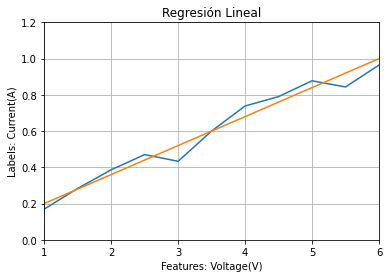

In [10]:
# Features are graphed with dataset labels and estimates
plt.plot(features,labels) # Plot labels vs features
plt.plot(features,labels_estimator) # Plot labels_estimator vs features
plt.xlabel('Features: Voltage(V)') # Set y label
plt.ylabel('Labels: Current(A)') # Set y label
plt.title('Regresión Lineal') # Set title
plt.xlim(1.0, 6.0) # Set x limits
plt.ylim(0, 1.2) # Set y limits
plt.grid() # On grid
plt.show() # Show graph